In [1]:
from WeatherModel import SarimaWeatherModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
PRED_WINDOW=12

In [3]:
model_exog = SarimaWeatherModel(predict_window=PRED_WINDOW)

In [4]:
train_data = np.load('weather_14_train.npy')
test_data = np.load('current_weather_test.npy')

In [5]:
sm_exog = model_exog.train(train_data)

In [6]:
model_exog.to_dict()

{'order': (1, 1, 1),
 'seasonal_order': (1, 1, 1, 24),
 'params': [0.45670275163378954,
  -0.02984450193375315,
  0.11648393854398918,
  -0.016150682971596723,
  -0.062488504456956716,
  -0.245071773367193,
  -0.29835276201595157,
  -0.23557155570378657,
  1.0082256372000871e-05]}

In [7]:
sm_exog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  268
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                1048.889
Date:                            Tue, 29 Apr 2025   AIC                          -2079.779
Time:                                    14:15:33   BIC                          -2048.341
Sample:                                         0   HQIC                         -2067.116
                                            - 268                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4567      0.043     10.727      0.000       0.373       0.540
x2            -0.0298      0.056     -0.534      0.593      -0.139       0.080
x3             0.1165      0.012     10.122      0.000       0.094       0.139
x4            -0.0162      0.116     -0.139      0.889      -0.244       0.211
ar.L1         -0.0625      0.243     -0.257      0.797      -0.539       0.414
ma.L1         -0.2451      0.249     -0.984      0.325      -0.733       0.243
ar.S.L24      -0.2984      0.143     -2.083      0.037      -0.579      -0.018
ma.S.L24      -0.2356      0.165     -1.432      0.152      -0.558       0.087
sigma2      1.008e-05   1.04e-06      9.732      0.000    8.05e-06    1.21e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.97   Prob(JB):                         0.61
Heteroskedasticity (H):               0.93   Skew:                             0.03
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

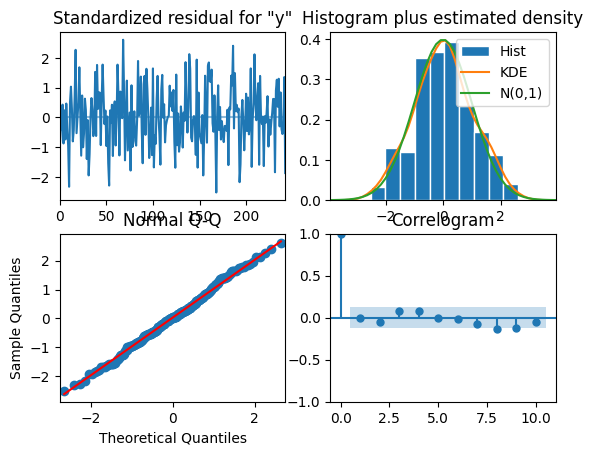

In [8]:
_ = sm_exog.plot_diagnostics()

In [9]:
ci_exog = model_exog.predict(test_data, alpha=0.5)
mean_exog = model_exog.predict(test_data[:,0])

In [10]:
model_1dim = SarimaWeatherModel(predict_window=PRED_WINDOW)

In [11]:
sm_1_dim = model_1dim.train(train_data[:,0])

/opt/homebrew/Caskroom/miniconda/base/envs/ml_adapter_sarima/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


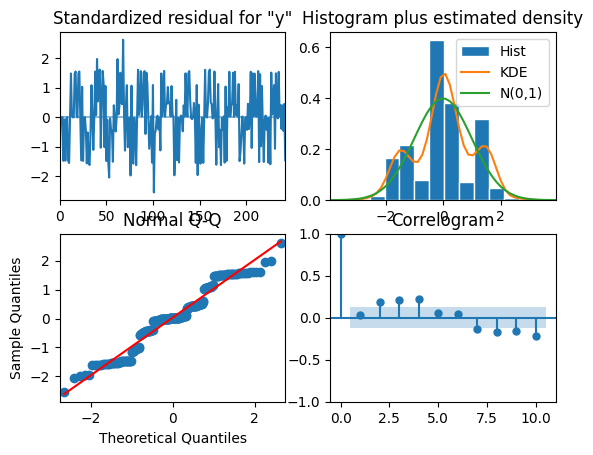

In [12]:
_ = sm_1_dim.plot_diagnostics()

In [13]:
sm_1_dim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  268
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                1021.408
Date:                            Tue, 29 Apr 2025   AIC                          -2032.816
Time:                                    14:15:38   BIC                          -2015.351
Sample:                                         0   HQIC                         -2025.782
                                            - 268                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1349      1.451     -0.093      0.926      -2.979       2.709
ma.L1          0.0848      1.484      0.057      0.954      -2.823       2.993
ar.S.L24      -0.3972      0.231     -1.722      0.085      -0.849       0.055
ma.S.L24       0.1219      0.263      0.463      0.644      -0.394       0.638
sigma2      1.294e-05   1.42e-06      9.113      0.000    1.02e-05    1.57e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 3.06
Prob(Q):                              0.57   Prob(JB):                         0.22
Heteroskedasticity (H):               0.73   Skew:                            -0.09
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
ci_1dim = model_1dim.predict(test_data[:,0], alpha=0.05)
mean_1dim = model_1dim.predict(test_data[:,0])
mean_1dim

array([ 9.0540705 ,  8.57618569,  8.27189826,  8.4005632 ,  9.03444879,
       10.9113842 , 13.35299031, 14.50440717, 16.01045231, 16.30840356,
       17.75730239, 17.11946091])

In [15]:
mean_fc = model_1dim.predict(test_data[:,0], start=test_data.shape[0], end=test_data.shape[0]+PRED_WINDOW)
ci_fc = model_1dim.predict(test_data[:,0], start=test_data.shape[0], end=test_data.shape[0]+PRED_WINDOW, alpha=0.05)

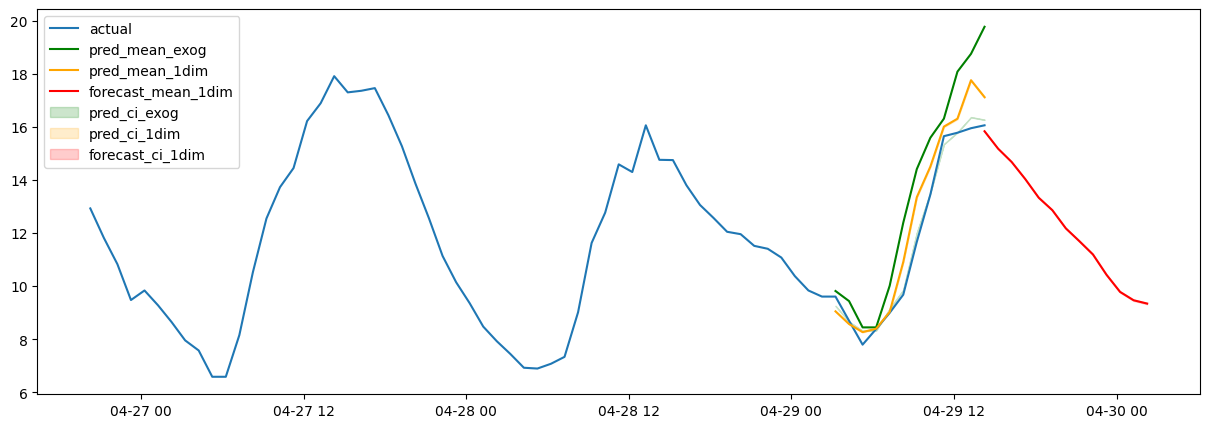

In [16]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
pred_len=ci_1dim.shape[0]
pred_idx=pd.date_range(end='now',periods=pred_len,freq='1h')
tst_len=test_data.shape[0]
frc_len=mean_fc.size
tst_idx=pd.date_range(end='now',periods=tst_len,freq='1h')
frc_idx=pd.date_range(start='now', periods=frc_len, freq='1h')
ax.plot(tst_idx,test_data[:, 0], label='actual')
ax.plot(pred_idx,mean_exog,label='pred_mean_exog', color='green')
ax.plot(pred_idx,mean_1dim,label='pred_mean_1dim', color='orange')
ax.plot(frc_idx,mean_fc,label='forecast_mean_1dim', color='red')
ax.fill_between(
    pred_idx,
    ci_exog[:, 0],
    ci_exog[:, 1], color='green', alpha=.2,
    label='pred_ci_exog'
)
ax.fill_between(
    pred_idx,
    ci_1dim[:, 0],
    ci_1dim[:, 1], color='orange', alpha=.2,
    label='pred_ci_1dim'
)
ax.fill_between(
    frc_idx,
    ci_fc[:, 0],
    ci_fc[:, 1], color='red', alpha=.2,
    label='forecast_ci_1dim'
)
ax.legend()
None

In [17]:
from ml_adapter.numpy import  V1NumpyModelAdapter, V1NumpyNoLoadAdapter

In [18]:
LOC='weather_pred_plug'

In [19]:
!rm -fr weather_pred_plug

In [20]:
adapter = V1NumpyModelAdapter(model=model_1dim,model_path='model.sav',location=LOC)

In [21]:
await adapter.add_script('WeatherModel.py')

WeatherModel.py <ml_adapter.base.assets.python.PythonScriptAsset>

In [22]:
adapter.requirements.add('statsmodels')

['statsmodels']

In [23]:
adapter.as_plug({ 'name': 'SarimaWeatherPrediction' })

In [24]:
await adapter.save()

In [25]:
from waylay.sdk import WaylayClient
client = WaylayClient.from_profile('aws-dev')
import logging
logging.basicConfig(level='INFO')


In [26]:
ref = await client.ml_tool.create_plug(adapter, version='0.0.5', draft=True)

INFO:httpx:HTTP Request: POST https://api-aws-dev.waylay.io/accounts/v1/tokens?grant_type=client_credentials "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api-aws-dev.waylay.io/registry/v2/plugs/?draft=true&comment=&async=true "HTTP/1.1 202 Accepted"


In [27]:
ref = await client.ml_tool.wait_until_ready(ref)
ref

INFO:ml_adapter.sdk.tool:Waiting for SarimaWeatherPrediction@0.0.5 to be ready:
INFO:ml_adapter.sdk.tool:listening on https://api-aws-dev.waylay.io/registry/v2/jobs/events?type=verify&id=740799ef-d515-4704-8718-903851c9899e$hcFhBWLzLsfR-7isZxeH5&children=true
INFO:httpx:HTTP Request: GET https://api-aws-dev.waylay.io/registry/v2/jobs/events?type=verify&id=740799ef-d515-4704-8718-903851c9899e$hcFhBWLzLsfR-7isZxeH5&children=true "HTTP/1.1 200 OK"
INFO:ml_adapter.sdk.tool:SarimaWeatherPrediction@0.0.5 build: active
INFO:ml_adapter.sdk.tool:SarimaWeatherPrediction@0.0.5 deploy: waiting
INFO:ml_adapter.sdk.tool:SarimaWeatherPrediction@0.0.5 deploy: active
INFO:ml_adapter.sdk.tool:SarimaWeatherPrediction@0.0.5 deploy: completed
{'data': {'returnvalue': {'deploySpec': {'service': 'fn-8d4e469452472c575c2ecfccb94a8f4b0ca854b0', 'image': 'registry.dev.waylay.io/openfaas-plugs/740799ef-d515-4704-8718-903851c9899e/275fcb9ea26baca50fb8ee68b37119cab8f4e800:0.0.5-2e90a912', 'namespace': 'openfaas-fn-

{'entity': {'createdBy': 'users/08e92c94-0a45-4f69-8405-3c2e46dd0cf9',
  'createdAt': '2025-04-29T12:15:42.824Z',
  'updatedBy': 'users/08e92c94-0a45-4f69-8405-3c2e46dd0cf9',
  'updatedAt': '2025-04-29T12:15:42.837Z',
  'status': 'running',
  'runtime': {'deprecated': False,
   'upgradable': False,
   'name': 'plug-python3',
   'version': '0.2.0'},
  'deprecated': False,
  'draft': True,
  'plug': {'name': 'SarimaWeatherPrediction',
   'version': '0.0.5',
   'runtime': 'plug-python3',
   'metadata': {'tags': [{'name': 'MLAdapter', 'color': '#4153ea'}],
    'documentation': {'description': '',
     'states': [{'name': 'PREDICTED',
       'description': 'The model inference succeeded.'},
      {'name': 'FAILED', 'description': 'The model inference failed.'}],
     'input': [{'name': 'instances',
       'description': 'A tensor of numeric input data (KServe V1 protocol)'}],
     'output': [{'name': 'predictions',
       'description': 'A tensor of numeric output data (KServe V1 protocol)'

In [30]:
await client.ml_tool.test_plug(ref, test_data[:,0].tolist())

INFO:httpx:HTTP Request: POST https://api-aws-dev.waylay.io/rules/v1/sensors/SarimaWeatherPrediction/versions/0.0.4 "HTTP/1.1 200 OK"


[14.271490321589685,
 14.315102460632987,
 14.417318436362768,
 13.396978446793247,
 12.227328967932898,
 10.815023118206074,
 9.562106224530867,
 8.271979527991652,
 7.179230896711301,
 6.717455437434849,
 5.928787284859706,
 5.355954309038201,
 4.816017656958601,
 4.335975620794944,
 4.031979398826124,
 4.160604841806219,
 4.7944955350308245,
 6.671430425778622,
 9.113036786026637,
 10.264453475006837,
 11.770499525516337,
 12.068449864202876,
 13.5173496599571,
 12.8795071399425]

In [32]:
await adapter.call({'inputs': {'main':test_data[:,0].tolist(), 'start':None}})

{'outputs': [9.054070495056015,
  8.576185692589197,
  8.271898261105976,
  8.400563198398801,
  9.034448789859788,
  10.911384202855036,
  13.352990311792109,
  14.504407168763407,
  16.010452306630786,
  16.308403555898987,
  17.757302391897966,
  17.11946091226356]}